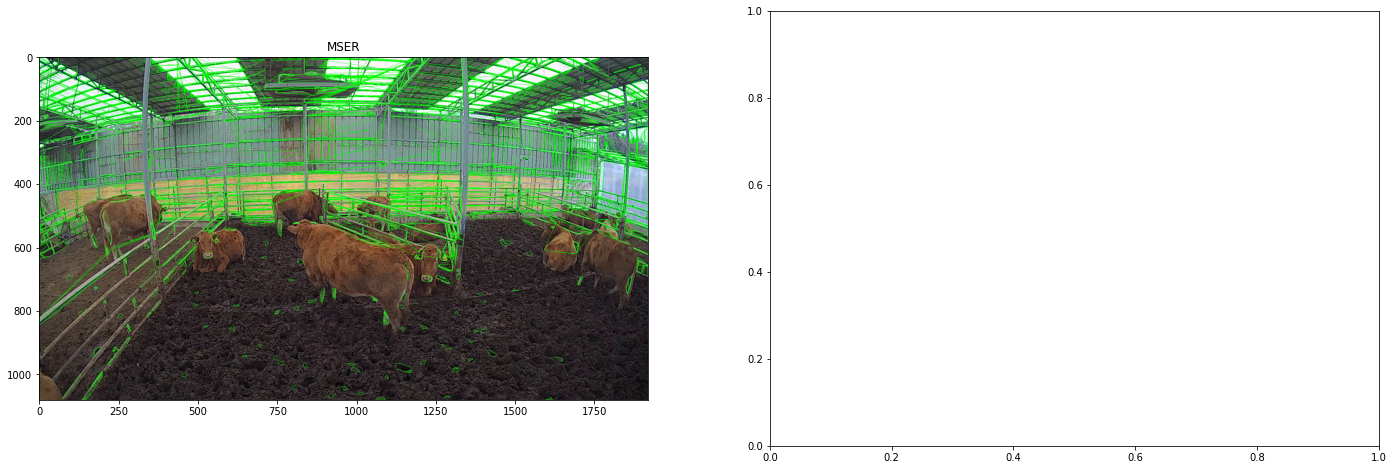

In [4]:
import os, pathlib, json, cv2, cv2 as cv
from tqdm import tqdm, trange
from os import walk
import matplotlib.pyplot as plt 

file = "./ModelData/가축 행동 영상/Training/[원천]소_bbox/livestock_cow_bbox_000001.jpg"

img_infos = []

# read original image
img = cv2.imread( file )
# convert to grayscale image
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# MSER (Maximally Stable Extreme Regions) DEtection
mser = cv2.MSER_create() 
#mser.setMinArea(100)
#mser.setMaxArea(8000)

regions, boxes = mser.detectRegions(gray)

mser_img = img.copy()
hulls = [cv2.convexHull(p.reshape(-1, 1, 2)) for p in regions]
cv2.polylines(mser_img, hulls, 1, (0, 255, 0))

#img_infos.append( (img, "org") )
#img_infos.append( (gray, "grayscale"))
img_infos.append( (mser_img, "MSER"))

col_cnt = 2 
row_cnt = len( img_infos )//col_cnt; 
if row_cnt*col_cnt < len(img_infos ) :
    row_cnt += 1
pass

w = 12 ; h = 8
fig, charts = plt.subplots( row_cnt, col_cnt, figsize=(w*col_cnt, h*row_cnt) )
charts = charts.ravel() if row_cnt*col_cnt > 1 else [ charts ]
chart_idx = 0

for img_info in img_infos : 
    chart = charts[ chart_idx ] ; chart_idx +=1 
    
    img = img_info[0]
    title = img_info[1]
    if len( img.shape ) > 2 :
        img = img[:,:,::-1]
    
    chart.imshow( img, "gray" if len( img.shape ) < 3 else None )
    chart.set_title( title )
pass

plt.show()